In [16]:
%matplotlib inline
from scipy.optimize import minimize
import numpy as np
import traml

In [17]:
a = traml.Stack()

In [18]:
a.library.search('mgf2')

|     ID | SHELF   | BOOK   | PAGE    | DESCRIPTION                 |
|--------+---------+--------+---------+-----------------------------|
| 105401 | main    | MgF2   | Li-o    | Li 1980: n(o) 0.14-7.5 µm   |
| 105402 | main    | MgF2   | Li-e    | Li 1980: n(e) 0.14-7.5 µm   |
| 105403 | main    | MgF2   | Dodge-o | Dodge 1984: n(o) 0.2-7.0 µm |
| 105404 | main    | MgF2   | Dodge-e | Dodge 1984: n(e) 0.2-7.0 µm |


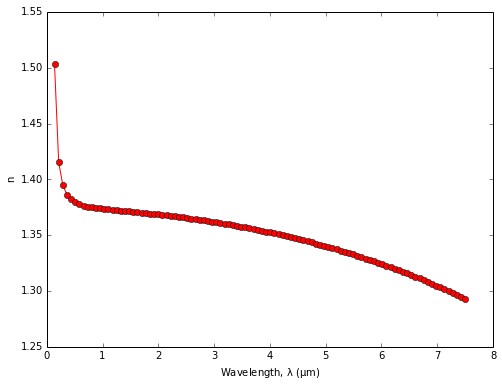

In [19]:
sio2 = 111407
mgf2 = 105401
a.library.plot(105401)

In [20]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
          
        
        stack.d(i, x[i-1])
    #stack.d(1,x[0])
    #stack.d(2,x[1])
    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    min = 1-stack.average(TR, c, delta)
    #min = stack.average(TR, c, delta)
    #print min

    return min**10

In [21]:
def test(stack, film_range):
    for i in range(film_range[0],film_range[1]):
        print stack.config[i], film_range

In [22]:
def minTR(stack, film_range, c, delta, TR='R'):
    print film_range
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        #print i
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append((2,1000))
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    #stack.plot()
    print layers
    return result

In [24]:
a.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |


In [33]:
c = traml.Stack()

peak = 0.632
delta = 0.005
mat2 = mgf2 #MgF2
mat1 = sio2 #SiO2
#mat2 = 114701 #ZnS
#mat2 = 112003 #ZnO
#mat2 = 110902 #MgO
#mat1 = 110104 #Al2O3

R = []
n = []
it = []


for i in range(0, 50):
    if i % 2 == 0:
        print 'even', i
        c.add(mat1,100)
    else:
        c.add(mat2,100)
        
    
    
    result = minTR(c, [1,len(c.config)-1], peak, delta, TR='R')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    it.append(result.nit)
   
    #c.table()
    print '============================================================================================'
    print c.average('R',peak,delta)
    print '============================================================================================'

even 0
[1, 1]
[1]
0.0820959739392
[1, 2]
[1, 2]
0.0820206083295
even 2
[1, 3]
[1, 2, 3]
0.0819805499068
[1, 4]
[1, 2, 3, 4]
0.0818099612273
even 4
[1, 5]
[1, 2, 3, 4, 5]
0.0819139042491
[1, 6]
[1, 2, 3, 4, 5, 6]
0.110764792394
even 6
[1, 7]
[1, 2, 3, 4, 5, 6, 7]
0.110756262373
[1, 8]
[1, 2, 3, 4, 5, 6, 7, 8]
0.110703842937
even 8
[1, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
0.110678300555
[1, 10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0.110573739324
even 10
[1, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
0.110531320012
[1, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
0.110375172102
even 12
[1, 13]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
0.110316101353
[1, 14]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
0.110109198243
even 14
[1, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
0.109372411761
[1, 16]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
0.144864192413
even 16
[1, 17]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
0.145466426888
[1, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9

In [26]:
import matplotlib.pyplot as plt
c.set_range([0.25, 1])

In [27]:
R

[0.082871480495969069,
 0.1122385938025994,
 0.11223216475800525,
 0.1481979554813182,
 0.14818642864617407,
 0.18958007800051746,
 0.18956325168478036,
 0.23513033147861245,
 0.23510829348442963,
 0.28357418788136679,
 0.28355384908803249,
 0.33364366270660795,
 0.33367267296598901,
 0.38418175057485721,
 0.3843385527656179,
 0.43434283319216305,
 0.43435599761764776,
 0.48255158318195973,
 0.48061139248409912,
 0.52929719212562443,
 0.52007462741395249,
 0.57525856881801229,
 0.57123586592894648,
 0.6130162444854601,
 0.60073045175087714,
 0.65751811254021475,
 0.65007514853671089,
 0.68901626750929368,
 0.67802397228284694,
 0.72700073759915695,
 0.71388069045328162,
 0.75714923107673537,
 0.74512759241659321,
 0.78481759134627271,
 0.77354853925095601,
 0.80960454375561497,
 0.79963059867997655,
 0.83176359300317815,
 0.82270640612713741,
 0.85112697779465507]

In [28]:
%matplotlib inline
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


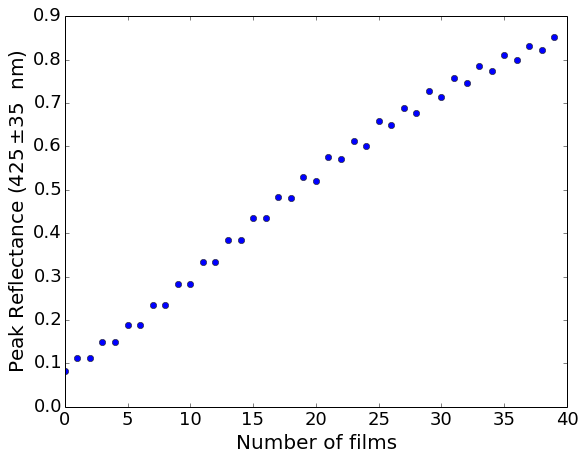

In [29]:
%matplotlib inline
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

ax.plot(R, 'o')
ax.set_xlim([0,40])
ax.set_xlabel(r'Number of films', fontsize=20)
ax.set_ylabel(r'Peak Reflectance ($425\pm35$  nm)', fontsize=20)


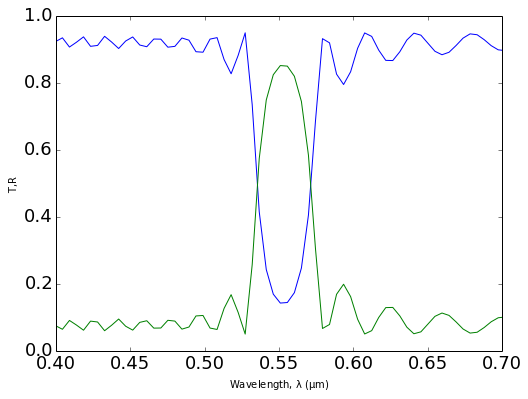

In [31]:
c.set_range([0.4,0.7])
c.plot()

In [32]:
c.table()

|   # |   Material | Thickness (nm)   | Type      |
|-----+------------+------------------+-----------|
|   0 |     301005 | --               | substrate |
|   1 |     111407 | 93.5378973682    | passive   |
|   2 |     105401 | 100.356178938    | passive   |
|   3 |     111407 | 93.5402241522    | passive   |
|   4 |     105401 | 100.355443681    | passive   |
|   5 |     111407 | 93.5336875127    | passive   |
|   6 |     105401 | 100.344442184    | passive   |
|   7 |     111407 | 93.513610655     | passive   |
|   8 |     105401 | 100.318102111    | passive   |
|   9 |     111407 | 93.4805189066    | passive   |
|  10 |     105401 | 100.287518475    | passive   |
|  11 |     111407 | 93.4456976637    | passive   |
|  12 |     105401 | 100.25582458     | passive   |
|  13 |     111407 | 93.4188949204    | passive   |
|  14 |     105401 | 100.23046397     | passive   |
|  15 |     111407 | 93.3800980432    | passive   |
|  16 |     105401 | 100.197271836    | passive   |
|  17 |     

In [ ]:
c.remove()

In [ ]:
d.plot()

In [ ]:
print d.average('R',0.5, 0.02)